In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm, neighbors
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
import sklearn.feature_selection
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn import metrics

In [2]:
df= pd.read_csv("datasets.csv")
df.columns=['cropType','cropDays','soilMoisture','temp','humidity','Irrigation']

# The Training Dataset

In [3]:
df.head(10) 
#[Wheat, GroundNuts, Garden Flowers, Maize , Paddy , Potato, Pulse, SugarCane, Coffee]

,cropType,cropDays,soilMoisture,temp,humidity,Irrigation
0,2,3,189,24,50,0
1,2,5,345,21,55,0
2,2,7,653,20,54,1
3,2,9,198,21,52,0
4,2,11,340,24,48,0
5,2,13,659,26,40,1
6,2,15,167,24,40,0
7,2,17,389,21,37,0
8,2,19,650,22,35,1
9,2,21,221,26,34,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
cropType        500 non-null int64
cropDays        500 non-null int64
soilMoisture    500 non-null int64
temp            500 non-null int64
humidity        500 non-null int64
Irrigation      500 non-null int64
dtypes: int64(6)
memory usage: 23.5 KB


In [5]:
df.isnull().values.any() # No misssing values 

False

In [6]:
df.describe()

,cropType,cropDays,soilMoisture,temp,humidity,Irrigation
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,5.014000,64.180000,411.054000,24.686000,39.348000,0.392000
std,2.754811,45.894665,199.155721,12.123422,22.628632,0.488686
min,1.000000,1.000000,120.000000,14.000000,11.000000,0.000000
25%,2.000000,27.000000,230.000000,20.000000,19.000000,0.000000
50%,5.000000,57.500000,368.000000,24.000000,32.000000,0.000000
75%,8.000000,90.250000,554.000000,28.250000,65.000000,1.000000
max,9.000000,210.000000,990.000000,263.000000,85.000000,1.000000


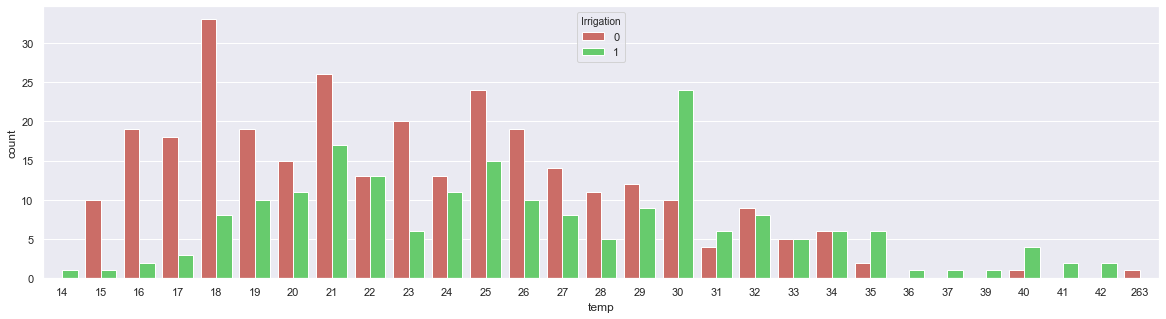

In [7]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="temp", hue="Irrigation", data=df)

# Dependency of target variable with other columns

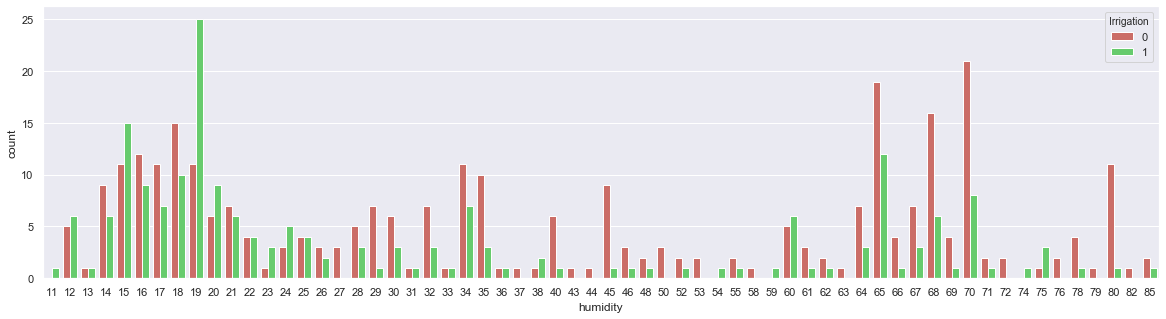

In [8]:
sns.set(style="darkgrid")
sns.set_palette("hls",3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="humidity", hue="Irrigation", data=df)

# Outliers Detection and Treatment

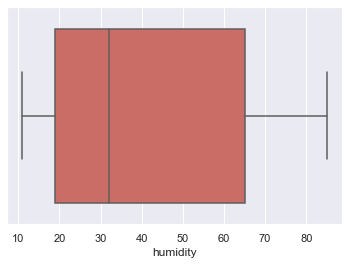

In [9]:
sns.boxplot(x=df['humidity']) # No outliers

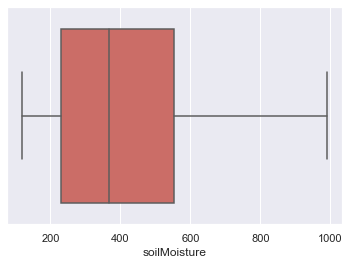

In [10]:
sns.boxplot(x=df['soilMoisture']) # No outliers 

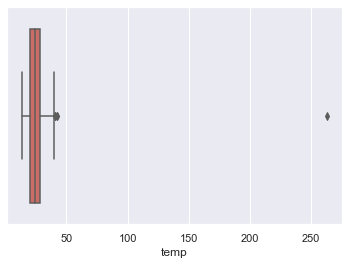

In [11]:
sns.boxplot(x=df['temp'])

In [12]:
# IQR Treatment for the outliers 
q1= df.temp.quantile(0.25)
q3= df.temp.quantile(0.75)
print(q1,q3)

20.0 28.25


In [13]:
iqr= q3-q1

lower_limit= q1-1.5*iqr
upper_limit= q3+ 1.5*iqr

print(lower_limit, upper_limit)

7.625 40.625


In [14]:
new_df= df[(df.temp> lower_limit) & (df.temp< upper_limit)]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 499
Data columns (total 6 columns):
cropType        495 non-null int64
cropDays        495 non-null int64
soilMoisture    495 non-null int64
temp            495 non-null int64
humidity        495 non-null int64
Irrigation      495 non-null int64
dtypes: int64(6)
memory usage: 27.1 KB


In [15]:
new_df.corr()

,cropType,cropDays,soilMoisture,temp,humidity,Irrigation
cropType,1.000000,0.140536,-0.227214,-0.170107,0.123557,-0.013002
cropDays,0.140536,1.000000,0.152038,0.098890,-0.061302,-0.084161
soilMoisture,-0.227214,0.152038,1.000000,0.247847,-0.237808,0.687352
temp,-0.170107,0.098890,0.247847,1.000000,-0.649049,0.265224
humidity,0.123557,-0.061302,-0.237808,-0.649049,1.000000,-0.189528
Irrigation,-0.013002,-0.084161,0.687352,0.265224,-0.189528,1.000000


In [16]:
final_df= new_df.drop(['cropDays'], axis=1)

In [17]:
final_df= final_df.drop(['cropType'], axis=1) 

In [18]:
final_df.head()

,soilMoisture,temp,humidity,Irrigation
0,189,24,50,0
1,345,21,55,0
2,653,20,54,1
3,198,21,52,0
4,340,24,48,0


In [19]:
x=np.array(final_df.drop(['Irrigation'],1))
y=np.array(final_df['Irrigation'])

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1=pd.DataFrame(scaler.fit_transform(x),columns=['soilMoisture', 'temp', 'humidity'])

In [20]:
df1.head(5)

,soilMoisture,temp,humidity
0,-1.112119,-0.012384,0.462399
1,-0.325850,-0.553272,0.683461
2,1.226526,-0.733568,0.639249
3,-1.066758,-0.553272,0.550824
4,-0.351051,-0.012384,0.373975


In [21]:
x_train,x_test,y_train,y_test=train_test_split(df1,y,test_size=0.2,random_state=42)

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

for name, classifier in classifiers.items():
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc}") 
    

Logistic Regression: Accuracy = 0.8484848484848485
KNN: Accuracy = 0.898989898989899
Decision Tree: Accuracy = 0.8383838383838383
Random Forest: Accuracy = 0.8383838383838383
Gradient Boosting: Accuracy = 0.8484848484848485
SVM: Accuracy = 0.8787878787878788
Naive Bayes: Accuracy = 0.8484848484848485


C:\Users\Rishabh Raj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rishabh Raj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Rishabh Raj\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [23]:
clf_knn=neighbors.KNeighborsClassifier()
clf_knn.fit(x_train,y_train)
y_score_knn = clf_knn.predict_proba(x_test)[:, 1]
y_score_knn
y_pred_knn = clf_knn.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(acc_knn*100)

89.8989898989899


# Testing our model

# Arduino

In [24]:
import serial
import time
import schedule

In [39]:
def main_func():
    arduino = serial.Serial('com8', 9600)
    print('Established serial connection to Arduino')
    arduino_data = arduino.readline()

    decoded_values = str(arduino_data[0:len(arduino_data)].decode("utf-8"))
    list_values = decoded_values.split('x')

    for item in list_values:
        list_in_floats.append(float(item))

    print(f'Collected readings from Arduino: {list_in_floats}')
    live_data= np.array(list_in_floats)
    live_data= live_data.reshape([1,-1])
    prediction= clf_knn.predict(live_data)
    
    # Sends back the signal to arduino 
    if(prediction ==1):
        print("Irrigation is needed and Motor is switched on !!")
        arduino.write(b'1')
    else:
        print("IMotor has been turned off")
        arduino.write(b'0')
        

    arduino_data = 0
    list_in_floats.clear()
    list_values.clear()
    arduino.close()
    print('Connection closed')
    print('<----------------------------->')
    
# Declare variables to be used
list_values = []
list_in_floats = []

print('Program started')
#Setting up the Arduino5
schedule.every(5).seconds.do(main_func)

while True:
    schedule.run_pending()
    time.sleep(1)


Program started
Established serial connection to Arduino
Collected readings from Arduino: [904.0, 33.3, 56.0]
Irrigation is needed and Motor is switched on !!
Connection closed
<----------------------------->
Established serial connection to Arduino
Collected readings from Arduino: [910.0, 33.3, 56.0]
Irrigation is needed and Motor is switched on !!
Connection closed
<----------------------------->
Established serial connection to Arduino
Collected readings from Arduino: [915.0, 33.3, 56.0]
Irrigation is needed and Motor is switched on !!
Connection closed
<----------------------------->
Established serial connection to Arduino
Collected readings from Arduino: [918.0, 33.3, 56.0]
Irrigation is needed and Motor is switched on !!
Connection closed
<----------------------------->
Established serial connection to Arduino
Collected readings from Arduino: [923.0, 33.3, 56.0]
Irrigation is needed and Motor is switched on !!
Connection closed
<----------------------------->
Established serial 

ValueError: could not convert string to float: 